# Project 5 - Communicate Data Findings - Ford Go Bike

## by Rafael Vieira Jung

## Table of Contents

Part I - Gathering Data
Part II - Assessing Data
Part III - Cleaning Data
Part IV - EDA


## Introduction
The dataset i will use on this project is the "Ford GoBike System Data". this dataset includes information about individual rides made in a bike-sharing system covering San Francisco Bay Area.

The main questions i will try answer on this project are: **1- Which Month has the higher duration trip for bike rydes? 2 - Which hour are the highests duration trips by users? 3 - Which Weekday have the most duration trip by users? 4- Which is the Influence of Gender on this three Questions?


### Gathering Data
The first step is to gathering data from a lot of different archives. The 2017 data is complete on one table, but 2018 and 2019 data are separeted by month on different files. The dataset, i've got here: https://www.lyft.com/bikes/bay-wheels/system-data


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

%matplotlib inline

In [2]:
#I've downloaded the 2017, since it's only one file, and load to check if it's okay.
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
#The zip files, i've had to store then on zipfiles to unzip later. 
zipfiles = ["https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip",
            "https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip"]

**To Unzip:**

Since i've a lot of zip file links, i've to download them. And todo this operation i will use this documentation i've got on Stack Overflow: https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk





In [4]:
#A simple For Loop to unzip and extract the files. 
for link in zipfiles:
    resp = urlopen(link)
    zipfile = ZipFile(BytesIO(resp.read()))
    zipfile.extractall()

In [5]:
# I Will get by the hand the files i've donwloaded above to load them
downfiles = ['2017-fordgobike-tripdata.csv',
            '201801-fordgobike-tripdata.csv',
            '201802-fordgobike-tripdata.csv',
            '201803-fordgobike-tripdata.csv',
            '201804-fordgobike-tripdata.csv',
            '201805-fordgobike-tripdata.csv',
            '201806-fordgobike-tripdata.csv',
            '201807-fordgobike-tripdata.csv',
            '201808-fordgobike-tripdata.csv',
            '201809-fordgobike-tripdata.csv',
            '201810-fordgobike-tripdata.csv',
            '201811-fordgobike-tripdata.csv',
            '201812-fordgobike-tripdata.csv',
            '201901-fordgobike-tripdata.csv',
            '201902-fordgobike-tripdata.csv',
            '201903-fordgobike-tripdata.csv',
            '201904-fordgobike-tripdata.csv',
            '201905-baywheels-tripdata.csv',
            '201906-baywheels-tripdata.csv',
            '201907-baywheels-tripdata.csv',
            '201908-baywheels-tripdata.csv',
            '201909-baywheels-tripdata.csv']

Since i've all files downloaded on my work area, i will concat every file into one

In [6]:
#The next step is concat the datasets and check if ti's okay.
df_all = pd.DataFrame()
for csv in downfiles:
    df_all = df_all.append(pd.read_csv(csv))
df_all.head()

C:\Users\rafae\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\rafae\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,NaN,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,NaN,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,NaN,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,NaN,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


## Assessing Data

In [7]:
#Checking the dimensions of the dataset. 
df_all.shape

(4256681, 18)

In [8]:
#Checking Data types 
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256681 entries, 0 to 217985
Data columns (total 18 columns):
Unnamed: 16                object
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(9)
memory usage: 617.0+ MB


In [9]:
#checking the summary statistics os the dataset. 
df_all.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,4.256681e+06,4.256681e+06,4.222238e+06,4.256681e+06,4.256681e+06,3.890680e+06,4.222966e+06,4.256681e+06,4.256681e+06
mean,6.501384e+03,8.634332e+02,1.244301e+02,3.776759e+01,-1.223502e+02,1.983521e+03,1.265815e+02,3.776759e+01,-1.223513e+02
std,4.520113e+04,2.346951e+03,1.075190e+02,1.296368e-01,2.922881e-01,1.040687e+01,1.078914e+02,1.055024e-01,1.605519e-01
min,1.000000e+01,6.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,1.316000e+03,3.560000e+02,3.000000e+01,3.777106e+01,-1.224108e+02,1.978000e+03,3.600000e+01,3.777106e+01,-1.224117e+02
50%,2.558000e+03,5.640000e+02,9.000000e+01,3.778107e+01,-1.223971e+02,1.986000e+03,9.000000e+01,3.778107e+01,-1.223974e+02
75%,3.788000e+03,8.820000e+02,1.950000e+02,3.779728e+01,-1.222914e+02,1.991000e+03,1.960000e+02,3.779625e+01,-1.222912e+02
max,9.969630e+05,8.636900e+04,4.700000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.700000e+02,4.551000e+01,0.000000e+00


In [10]:
#checking the files that have null values. 
df_all.isnull().sum()

Unnamed: 16                4227057
bike_id                          0
bike_share_for_all_trip     553217
duration_sec                     0
end_station_id               34443
end_station_latitude             0
end_station_longitude            0
end_station_name             34440
end_time                         0
member_birth_year           366001
member_gender               362967
rental_access_method       4252788
start_station_id             33715
start_station_latitude           0
start_station_longitude          0
start_station_name           33711
start_time                       0
user_type                        0
dtype: int64

In [11]:
#checking Duplicates values. 
df_all.duplicated().sum()

0

### What is the structure of your dataset?
The Dataset Structure is 4256681 rows and 18 collumns

### What is/are the main feature(s) of interest in your dataset?
Our dependent variable is duration_sec- is the duration of use of the bike on seconds.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
end_time - Maybe later

# Cleaning Data
## Data Cleaning
### Quality Issues
**Remove Collumns Bike_id Unnamed**: 16 bike_share_for_all_trip start_station_id end_station_id

**Change Type**  Start_time end_time

**New Colums**  Create from start_time:Month, Weekday and Hour columns.

In [12]:
#The first Step is make a copy of the dataset
df_clean = df_all.copy()

### Quality Issue #1 - Remove columns from Data that won't be used on analysis
Define Remove the following columns from the dataset:

-Bike_id

-Unnamed: 16

-bike_share_for_all_trip

-start_station_id

-end_station_id

**Code**

In [13]:
#Let's Drop the collumns of null or missing values. 
df_clean.drop(['bike_id',
               'Unnamed: 16',
               'bike_share_for_all_trip',
               'start_station_id',
               'end_station_id'], axis=1,inplace = True)

**Test** 

In [14]:
df_clean.head()


,duration_sec,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,80110,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,NaN,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,78800,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,NaN,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,45768,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,NaN,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,62172,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,NaN,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,43603,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,NaN,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


### Quality Issue #2 - Change Start and End time Column
**Define**  Transform the datatype of start_time and end_time for timestamp

**Code**

In [15]:
#Change the datatype object of time columns. 
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

**Test**

In [16]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256681 entries, 0 to 217985
Data columns (total 13 columns):
duration_sec               int64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 454.7+ MB


### Quality Issue #3 -Create new Columns of start_time
**Define** Create Month, weekday and hour from start_time, using this doc: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

**code**

In [17]:
#since our Business problem is to check the Month, Weekday and Hour of start, i will creat new columns.
df_clean['start_month'] = pd.DatetimeIndex(df_clean['start_time']).month
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_hour'] = pd.DatetimeIndex(df_clean['start_time']).hour

**Test**

In [18]:
df_clean.head()


,duration_sec,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_month,start_weekday,start_hour
0,80110,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,NaN,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,12,Sun,16
1,78800,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,NaN,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,12,Sun,15
2,45768,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,NaN,NaN,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,12,Sun,22
3,62172,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,NaN,NaN,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,12,Sun,17
4,43603,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,NaN,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,12,Sun,14


# EDA

## Univariate Exploration

In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

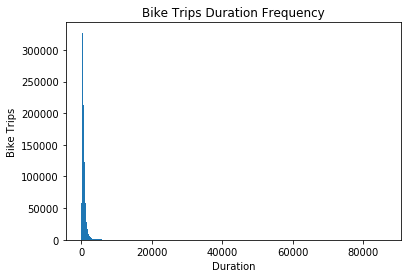

In [19]:
#The first feature to investigate is Duration_sec, since it's my dependent variable. 
bins = np.arange(0, df_clean['duration_sec'].max()+60,60)
df_clean['duration_sec'].plot(kind='hist',bins = bins)
plt.xlabel('Duration');
plt.ylabel('Bike Trips');
plt.title('Bike Trips Duration Frequency');

**We can Clearly see the distribution of duration trip has outliers, I will ignore this outliers values on the next analysis to see the distribution of short values od duration and see clearly the distribution of this feature.**



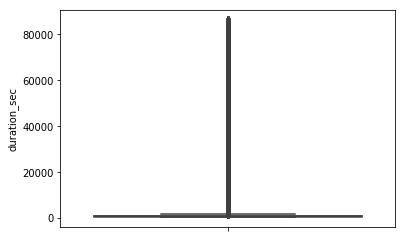

In [20]:
#Checking outliers.
sb.boxplot(y = df_clean['duration_sec']);

**This Plot looks so weird, looks like it has a lot of outliers. for remove this outliers i will use the IQR method, and the values above the "upper Fence, i'll Remove for further analysis.**



In [21]:
#Calculating the interquantile range.
q3 = df_clean['duration_sec'].quantile(.75)
q1 = df_clean['duration_sec'].quantile(.25)

iqr = q3 - q1

In [22]:
#Calculate the "upper fence" of outliers values and i will limit our plot on that value. 
q3 + (1.5*iqr)

1671.0

**Values Above 1671 are outliers, it isn't even 30 minutes. I will limite the max of X value on the plot by 1800 seconds = 30 minutes.just to get a round number and it's close to upper fence value.**

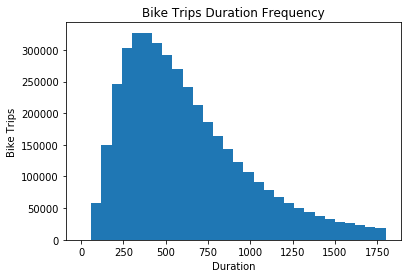

In [23]:
#Plot with the new maximum values. 
bins2 = np.arange(0, 1800+60,60)
df_clean['duration_sec'].plot( kind = 'hist', bins = bins2)
plt.xlabel('Duration');
plt.ylabel('Bike Trips');
plt.title('Bike Trips Duration Frequency');

**Looking to distribution of plot, it's clearly skewed to right, and this shows the consumer behavior of duration seconds aren't too long, i can verify that calculating the median of the feature below:**

In [24]:
#Duration_sec Median
df_all.duration_sec.median()

564.0

**Like i've said above, the median duration is less than 10 minutes**

**MONTH**

For Month analyses i will use bar chart distribution to see how is distribuited. 

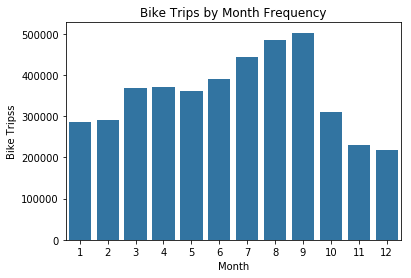

In [25]:
#Let's analyze the distribution of month
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_month',color = base_color);
plt.xlabel('Month');
plt.ylabel('Bike Tripss');
plt.title('Bike Trips by Month Frequency');

**The Distribution of the Month has the peak of the uses on august and on september and the smaller values are on november and december, and this i conclude is due to winter, and it's a little difficult to people use bike services on colder temperatures.** 

**Start Hour** 

To analyze Start Hour i will use bar chart too.

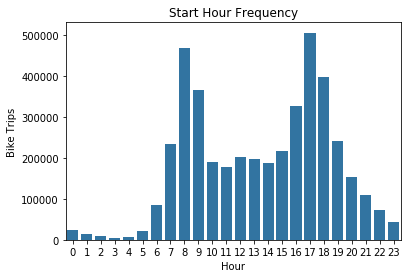

In [26]:
#distribution of start hour of bike trip. 
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_hour',color = base_color);
plt.xlabel('Hour');
plt.ylabel('Bike Trips');
plt.title('Start Hour Frequency');

**The Start Hour has two peaks: On 8 a.m and 17 p.m. And of course, 1 a.m to 5 a.m is the lowest hour of use. The user peak could easily correlated to hour to go to work and to go back home. 

**Weekday**

to analyze weekday i will use bar chart too, since it's a categorical variable. 

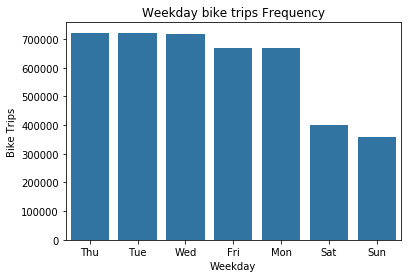

In [27]:
#Finally, about the univariate distributions, i will analyze the distribution of bike trips based on weekday. 
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_weekday',color = base_color, order = df_clean.start_weekday.value_counts().index);
plt.xlabel('Weekday');
plt.ylabel('Bike Trips');
plt.title('Weekday bike trips Frequency');

**GENDER**

Now i want to check the distribution of gender, to analyze which use more and of course, looking to wrong values.

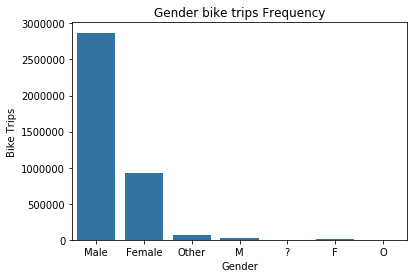

In [28]:
#The Distribution of gender
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='member_gender',color = base_color);
plt.xlabel('Gender');
plt.ylabel('Bike Trips');
plt.title('Gender bike trips Frequency');

**i've found a lot of values than Male and Female Values- no problem about that. But i'll analyze the frequency of Male and Female.

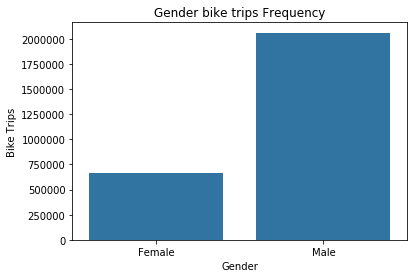

In [29]:
#Cleaning the wrong gender values. 
gena = df_clean.query("member_gender == 'Other'").index
genb = df_clean.query("member_gender == 'M'").index
genc = df_clean.query("member_gender == 'F'").index
gend = df_clean.query("member_gender == '?'").index
gene = df_clean.query("member_gender == 'O'").index

df_gen = df_clean.copy()

df_gen.drop(gena, inplace = True)
df_gen.drop(genb, inplace = True)
df_gen.drop(genc, inplace = True)
df_gen.drop(gend, inplace = True)
df_gen.drop(gene, inplace = True)

base_color = sb.color_palette()[0]
sb.countplot(data=df_gen, x='member_gender',color = base_color);
plt.xlabel('Gender');
plt.ylabel('Bike Trips');
plt.title('Gender bike trips Frequency');

**The gender distribution clearly shows the male is greater than female distribution. This need much more analyse to understand why this happens**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The main Variable of interest - duration of one trip on seconds, it has a lot of high points, and at first plot, they distorted a lot. When i removed the outliers, and set on 1800 seconds -half an hour. After that cleaning, the plot looks like skewed to right. Probably beacause the mostly of trips were short trips, maybe, again, maybe, based on time of the trip we can think that is because, if someone will use to longer time, probably will use a car.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**Start Month Distribution**  - This distribution clearly shows the bike trips have a great demand on august and september, i can infer this is due to school and university vacantion and the temperature is good to bike trip, and november and december are the lowest demands, probably beacause the winter.

**Start Hour Distribution** - The demand peak of bike trips are 8 a.m and 17 p.m, probalby the hour before and after the work. To go to work and to go to home from work. The lowest range hour of use is 1 am to 5 am due to of course, people sleeps. 

**Weekday trips** - The weekend is the lowest use of the bike service, it's counter intuitive, because i thought people would use a lot on weekend to go to park, for example. But, since i saw on the hours, probably people use to go to work the service.

**Member Gender** - The next, and last, univariate analysis i did, it was the member gender distribution, and mostly of gender users are mens. Why? This distribution can't answer that.

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

**MEMBER GENDER VS DURATION SEC**

To look which frequency each of gender have on duration feature.

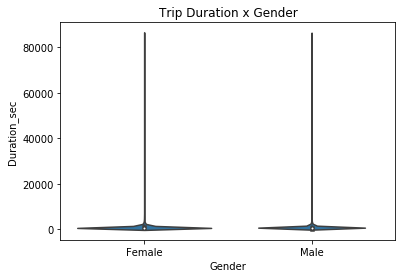

In [30]:
#since, the last distribution was about the user gender, the first one was duration sec and member gender. 
base_color = sb.color_palette()[0]
sb.violinplot(data = df_gen, x = 'member_gender' , y = 'duration_sec',color = base_color);
plt.xlabel('Gender');
plt.ylabel('Duration_sec');
plt.title('Trip Duration x Gender');

**Since the problem os duration sec will return to future plots, i'wll remove the outlier values, and just analyse the entries lower than 30 minutes**

In [31]:
#Remove the outliers from this analyze.
df_gen = df_gen.query("duration_sec <= 1800")

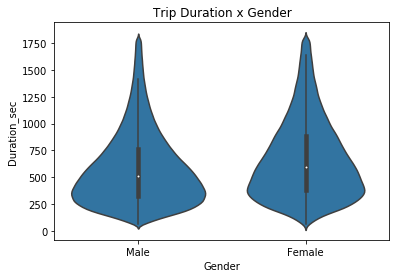

In [32]:
#Plot a violin plot to analyze the relationship between gender and duration_sec
base_color = sb.color_palette()[0]
sb.violinplot(data = df_gen, x = 'member_gender' , y = 'duration_sec',color = base_color);
plt.xlabel('Gender');
plt.ylabel('Duration_sec');
plt.title('Trip Duration x Gender');

**Here in this plot, we already can see, the frequency of men to less duration_sec is greater than female frequency. And Female frequency of higher values is greater than men's duration trip.**

**Weekday VS Duration**

Now, i'll compare the differences of the weekdays abot the duration, and i will use the violin plot again**


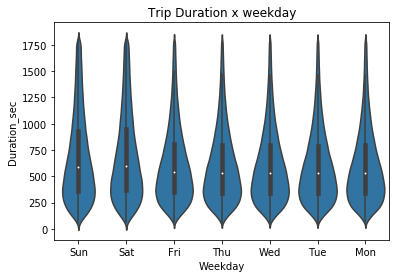

In [33]:
#Analyze the difference between the weekdays and the use of bikes.
base_color = sb.color_palette()[0]
sb.violinplot(data = df_gen, x = 'start_weekday' , y = 'duration_sec',color = base_color);
plt.xlabel('Weekday');
plt.ylabel('Duration_sec');
plt.title('Trip Duration x weekday');

**On this Violin Plot, it can clearly see on weekend the duration of a ryde is greater than weekday, and weekday has a great frequency on lower values of the duration trip**

**START HOUR VS DURATION**

Now, i will check using a bar plot the mean duration on each hour of a day**

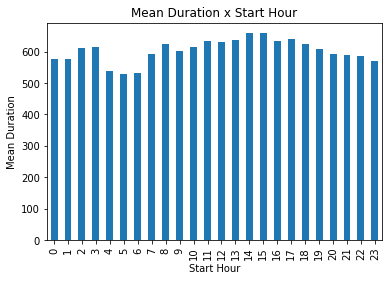

In [34]:
#Analyze it hours has mostly duration sec trips on the mean. 
df_gen.groupby('start_hour')['duration_sec'].mean().plot(kind='bar',x='duration_sec',y='start_hour', color = base_color);
plt.ylabel("Mean Duration");
plt.xlabel('Start Hour');
plt.title('Mean Duration x Start Hour');

Here, the difference isn't big, the plot has some higher values on 14 and 15 p.m, but this isn't show a great difference like i saw before.

**START MONTH VS DURATION**

Let's check the difference on the months and the duration of trip.

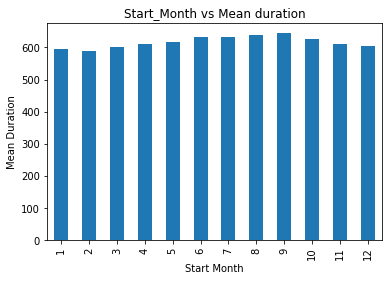

In [35]:
df_gen.groupby('start_month')['duration_sec'].mean().plot(kind='bar',x='duration_sec',y='start_hour', color = base_color);
plt.ylabel("Mean Duration");
plt.title("Start_Month vs Mean duration");
plt.xlabel('Start Month');

**The difference here isn't big, but again august and september have the higher values. Probably, again, this is due too season**

### Results of Bivariate Exploration
**Member_gender vs duration_sec** - The results fouds on this bivariate exploration need a little exploration further. Mens use bike trips, mostly, for short rides, when womens use to longer rides. why that?

**Start_weekday vs duration_sec** - the insights i've found on this plot is: The weekend has longer trips, when on weekdays people using for short rides, like i've found before, the rides occurs on hour to go to work, and to go back to home.

**Start_hour vs duration_sec**  - About this plot, there isn't much i have found. The shorter rides occurs 4 a.m until 6.am. It makes sense, it's sleed time for mostly of people, and maybe they use the service just to go to close locations.

**Start_month vs duration _Sec** - I can't find any great conclusion on that plot, but, august and september have the greatest rides. It's the bike trips peak use, i've found on nivariate plot of start_month.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**START HOUR VS MEAN DURATION BY WEEKDAY**

Since, i've a doubt on the use on the difference of weekend and weekday use, i will plot this line chart with color encoding to weekday.

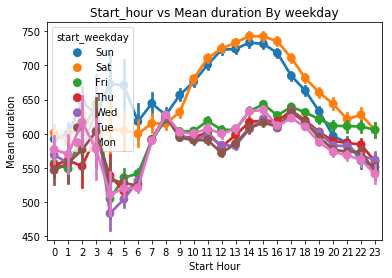

In [36]:
sb.pointplot(data = df_gen, x='start_hour', y='duration_sec', hue='start_weekday',height=5);
plt.ylabel("Mean duration");
plt.title("Start_hour vs Mean duration By weekday");
plt.xlabel('Start Hour');



**Now, it's easy to see the use on weekend is on evening, and have a great mean duration, of course, few people works on weekend. and the mean duration on weekdays has its peak at 8a.m and 5 p.m- prbably, due to work.**

**START weekday VS MEAN DURATION BY gender**

Let's Check if the gender has difference not just of number of users, but the duration use on the weekdays

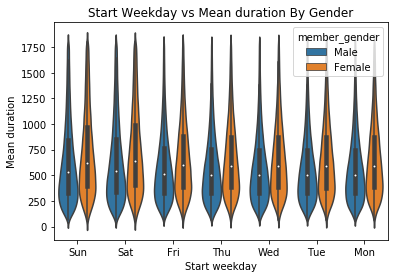

In [37]:
sb.violinplot(data = df_gen, x = 'start_weekday' , y = 'duration_sec',hue = 'member_gender');
plt.ylabel("Mean duration");
plt.title("Start Weekday vs Mean duration By Gender");
plt.xlabel('Start weekday');


**Since it is not clear the differences of time, i will use other kind of plot to discovery the gender consumer behavior, i will use the lineplot to analyze the difference between gender**

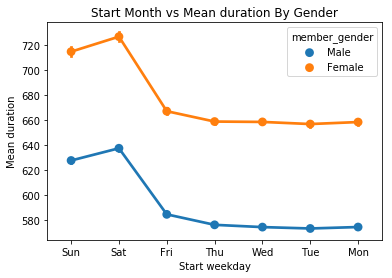

In [38]:
#Line plot to see the differences of gender
sb.pointplot(data = df_gen, x='start_weekday', y='duration_sec', hue='member_gender',height=5);
plt.ylabel("Mean duration");
plt.title("Start Month vs Mean duration By Gender");
plt.xlabel('Start weekday');


**Now, it's very clear. The Women use for more time than men, but looks, the change of line plot is almost the same!**

**START monthy VS MEAN DURATION BY gender**

Let's Check now the difference of gender between months, and if it's relevant.

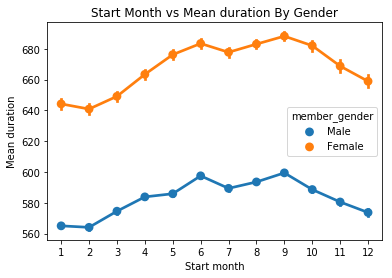

In [39]:
#Line plot to see the differences of gender
sb.pointplot(data = df_gen, x='start_month', y='duration_sec', hue='member_gender',height=5);
plt.ylabel("Mean duration");
plt.title("Start Month vs Mean duration By Gender");
plt.xlabel('Start month');


**THe consumer behavior of hours is indepent of gender. But again, we can see women using more time than men.

**START hour VS MEAN DURATION BY gender**

the last plot of this work is to analyze the difference of gender on different hour of day.

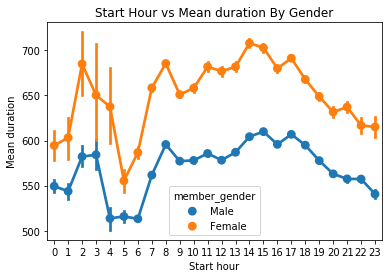

In [40]:
#Line plot to see the differences of gender
sb.pointplot(data = df_gen, x='start_hour', y='duration_sec', hue='member_gender',height=5)
plt.ylabel("Mean duration");
plt.title("Start Hour vs Mean duration By Gender");
plt.xlabel('Start hour');


**The difference Is just of Mean duration, and i can't conclude, womens use different than men the service- of course, Women Uses for more time than men.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The observation i've found on the multivariate plots, complemente the other i've ploted before. For example, the bivariate violin plot of weekday vs duration_sec showed on weekend, the trips take longer durations than on weekdays. Now we can clearly see that with the first plot of multivariate, showing the great ascend of duration sec on weekends and on evening, showing the use to go to a park, for example. 

The duration sec of women is greater than men duration sec. I infer this is due to men use more fast the bike- But of course, this need much more investigation. but is curious see the use of women on every condition last more time than men use. 



### Were there any interesting or surprising interactions between features?

The great surprise and knowledge i've got from this dataset is the gender influences on the duration seconds- my independent variable. It's very curious the fact the changes of curve of the male and female are the same! The consumer behavior is same based on the variance of curves, the change is same on start hour, weekday and start month.

In [41]:
### Storing Data 
df_gen.to_csv('df_final.csv')

### Conclusions
Answering the questions i've set on the introduction of the project: 1- Which Month has the higher duration trip for bike rydes? 2 - Which hour are the highests duration trips by users? 3 - Which Weekday have the most duration trip by users?,4- Which is the Influence of Gender on this three Questions? i have these finds:

1- The best Months of use and habe the higher duration trip are august and september, mayber because it's summer/autumn, and it isn't too hot or cold, and at same time they have the greatest number of bike trips.

2- Problably this question is the greatest find of this work: People. probably use more to go to work since its peaks of use is 8 a.m and 5 p.m. But on weekend, due to multivariate line plot, it shows on weekend the mean duration is great on evening, probably people use to go to park, for example.

3 - The most duration of trips are on weekend! Even the use is higher on weekdays, the service is used for longer time on weekends.

4- The gender don't have a impact of use on Month, HOur and Weekday duration bike rydes, but, it's clear to see the mean duration os women is 100 seconds above of men use, independent of the three features i use to explore the mean duration. This need further analysis to understand the difference between gender mean duration.